In [1]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
from IPython.display import display
import sympy as sp
# Если хочется скопировать latex код таблицы - нажми правой кнопкой на матрице > Show Math As > Tex commands
sp.init_printing(latex_mode="equation*")

def show_mat(mat):
    return sp.N(sp.Matrix(mat))

In [2]:
cluster_sizes = [
    3, #Забудовник
    4, #Критерії
    3, #Клас
    2, #Розташування
    1  #Цілі
]

In [7]:
one = 0,0,np.eye(3)
w_12 = 0,1,np.matrix([
        [.4, .3, .1, .5],
        [.4, .2, .3, .4],
        [.2, .5, .6, .1]
    ])
w_23 = 1,2,np.matrix([
        [.15, .2, .3],
        [.6, .3, .05],
        [.15, .2, .15],
        [.1, .3,.5]
    ])
w_31 = 2,0,np.matrix([
        [.4, .2, .6],
        [.3, .3, .2],
        [.3, .5, .2]
])
w_34 = 2,3,np.matrix([
    [.5, .1],
    [.3, .4],
    [.2, .5]
])

w_35 = 2,4,np.matrix([
    [.2],
    [.5],
    [.3]
])

w_43 = 3,2,np.matrix([
    [.8, .3, .4],
    [.2, .7, .6]
])

w_45 = 3,4, np.matrix([
    [.4],
    [.6]
])
cluster_weights = np.array([
        [0, 1, 0, 0, 0],
        [0, 0,.5, 0, 0],
        [1, 0, 0, 1,.6],
        [0, 0,.5, 0,.4],
        [0, 0, 0, 0, 0]
    ])


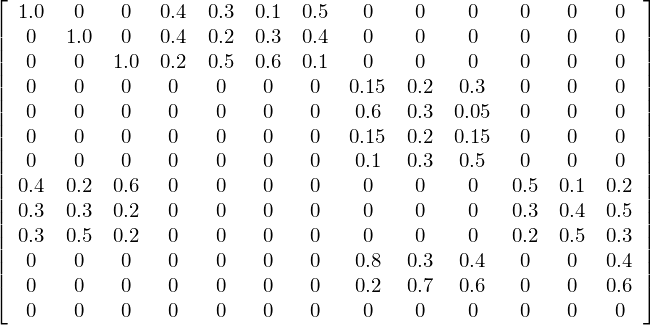

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


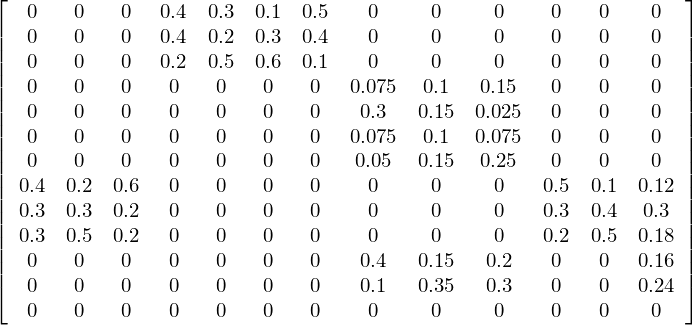

In [8]:
def position(x, y, sizes):
    return sum(sizes[:x]), sum(sizes[:y])

def mat_size(x,y, sizes):
    return sizes[x], sizes[y]    

def create_mat(sizes, mat_with_positions):
    size = sum(sizes)
    full = np.zeros((size, size))
    for x, y, mat  in mat_with_positions:
        sx, sy = mat.shape
        pos_x, pos_y = position(x, y, sizes)
        full[pos_x:pos_x+sx, pos_y:pos_y+sy] = mat
    return full

def mult(cluster_weights, super_mat):
    size = cluster_weights.shape
    for i in range(size[0]):
        for j in range(size[1]):
            sx, sy = mat_size(i,j,cluster_sizes)
            pos_x, pos_y = position(i,j,cluster_sizes)
            super_mat[pos_x:pos_x+sx, pos_y:pos_y+sy] = cluster_weights[i,j]*super_mat[pos_x:pos_x+sx, pos_y:pos_y+sy]
    
    return super_mat

super_mat = create_mat(cluster_sizes,[one, w_12, w_23, w_31, w_34, w_35, w_43, w_45])
display(show_mat(super_mat))
x = mult(cluster_weights, super_mat)
print(x.sum(axis=0))
show_mat(x)

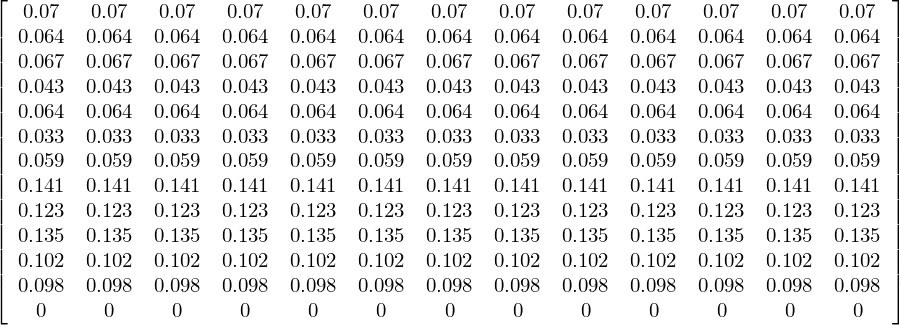

In [9]:
def limit_(x, eps=1e-15):
    norm = LA.norm(x)
    old_mat = x.copy()
    new_mat = x.copy()
    while norm >= eps:
        old_mat = new_mat.copy()
        new_mat = old_mat.dot(x)
        norm = LA.norm(new_mat - old_mat)
        
    return new_mat

show_mat(np.around(limit_(x), decimals=3))

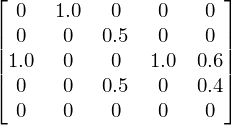

In [10]:
display(show_mat(cluster_weights))